# KMeans


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

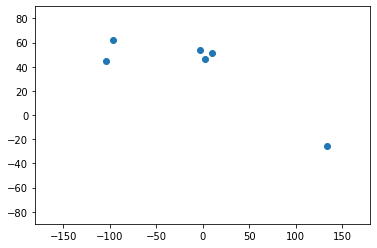

In [13]:
data = pd.read_csv("datasets/Countryclusters.csv")
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

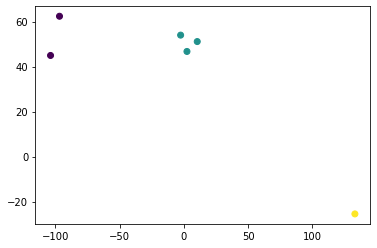

In [14]:
features = data[["Longitude", "Latitude"]]
kmeans = KMeans(n_clusters=3)
data["Clusters"] = kmeans.fit_predict(features)
plt.scatter(data["Longitude"], data["Latitude"], c=data["Clusters"])

Text(0, 0.5, 'WCSS')

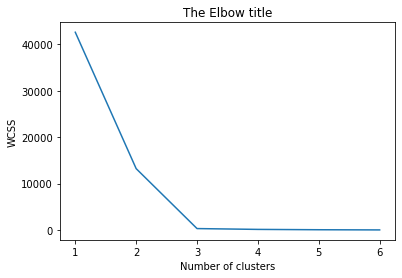

In [15]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title("The Elbow title")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

# PCA


In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

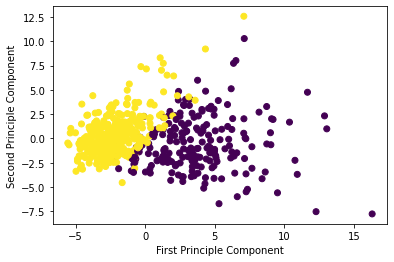

In [17]:
cancer = load_breast_cancer()
features = StandardScaler().fit_transform(cancer.data)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(features)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer.target)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

# Bagging and Boosting


In [18]:
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.ensemble import (
    BaggingClassifier,
    BaggingRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
)

In [19]:
wine = load_wine()
features = StandardScaler().fit_transform(wine.data)
target = wine.target

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25)

In [20]:
bagc = BaggingClassifier(n_estimators=20)
bagc.fit(X_train, Y_train)
Y_pred = bagc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

bagr = BaggingRegressor()
bagr.fit(X_train, Y_train)
Y_pred = bagr.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))

[[ 9  3  0]
 [ 0 17  2]
 [ 0  0 14]]
0.0491111111111111


In [21]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
Y_pred = gbr.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))

[[ 9  3  0]
 [ 2 15  2]
 [ 0  1 13]]
0.15276417969617015


# Back Propagation


In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [23]:
iris = load_iris()
X = iris.data
Y = pd.get_dummies(iris.target).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=4)

In [24]:
learning_rate = 0.1
iterations = 5000
N = Y_train.size
input_size = 4
hidden_size = 2
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

In [25]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
mean_squared_error = lambda Y_pred, Y_true: ((Y_pred - Y_true) ** 2).sum() / Y_pred.size
accuracy = lambda Y_pred, Y_true: (
    Y_pred.argmax(axis=1) == Y_true.argmax(axis=1)
).mean()

In [26]:
np.random.seed(10)
hlw = np.random.normal(scale=0.5, size=(input_size, hidden_size))
olw = np.random.normal(scale=0.5, size=(hidden_size, output_size))
for i in range(iterations):
    # Forward Propagation
    Z1 = np.dot(X_train, hlw)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, olw)
    A2 = sigmoid(Z2)

    # Calculating Error
    mse = mean_squared_error(A2, Y_train)
    acc = accuracy(A2, Y_train)
    results = results.append({"mse": mse, "accuracy": acc}, ignore_index=True)

    # Back Propagation
    E1 = A2 - Y_train
    dhlw = E1 * A2 * (1 - A2)

    E2 = np.dot(dhlw, olw.T)
    dolw = E2 * A1 * (1 - A1)

    # weight updates
    olw_update = np.dot(A1.T, dhlw) / N
    hlw_update = np.dot(X_train.T, dolw) / N

    olw = olw - learning_rate * olw_update
    hlw = hlw - learning_rate * hlw_update

<AxesSubplot:title={'center':'MSE'}>

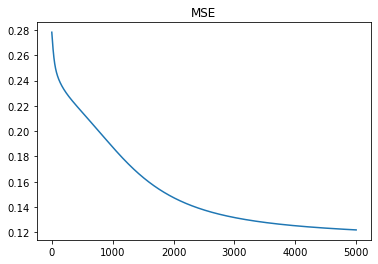

In [27]:
results.mse.plot(title="MSE")

<AxesSubplot:title={'center':'Accuracy'}>

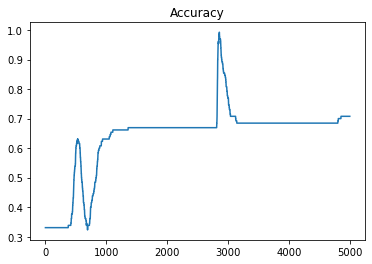

In [28]:
results.accuracy.plot(title="Accuracy")

In [29]:
Z1 = np.dot(X_test, hlw)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, olw)
A2 = sigmoid(Z2)

acc = accuracy(A2, Y_test)
print(f"Accuracy:{acc}")

Accuracy:0.8
